# Zadaci – Python osnove (NumPy, matplotlib)

U nastavku se nalazi 5 zadataka. Svaki zadatak sadrži opis i podkorake u Markdown ćelijama, kao i prazne kod ćelije u koje treba upisati rešenje.

## Zadatak 1: NumPy – reshape, view i modifikacije

Dat je jednodimenzionalni NumPy niz koji sadrži uzastopne celobrojne vrednosti.

**Podzadaci:**
1. Napraviti NumPy niz `x` koji sadrži vrednosti od 1 do 12  
2. Preoblikovati niz u matricu dimenzija `(3, 4)` i sačuvati je u promenljivoj `X`  
3. Izmeniti vrednost elementa u prvom redu i prvoj koloni matrice `X`  
4. Proveriti da li je došlo do promene u originalnom nizu `x`  
5. Proveriti i prikazati broj dimenzija i tip podataka u `X` promenljivoj

In [3]:
import numpy as np
x = np.arange(1,13)
X = x.reshape(3,4)
X[0,0] = 999
print(x,X)
X.ndim, X.dtype
import copy
X_new = copy.deepcopy(X)
X_new[0,0] =123
X_new, X , x

[999   2   3   4   5   6   7   8   9  10  11  12] [[999   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


(array([[123,   2,   3,   4],
        [  5,   6,   7,   8],
        [  9,  10,  11,  12]]),
 array([[999,   2,   3,   4],
        [  5,   6,   7,   8],
        [  9,  10,  11,  12]]),
 array([999,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]))

## Zadatak 2: NumPy – slučajni brojevi i statistika

Rad sa generatorom slučajnih brojeva i statističkim operacijama.

**Podzadaci:**
1. Inicijalizovati generator slučajnih brojeva pomoću  
   `np.random.default_rng(2025)`  
2. Generisati matricu `X` dimenzija `(100, 5)` iz standardne normalne raspodele  
3. Izračunati srednju vrednost i standardnu devijaciju **po kolonama**  
4. Izračunati ukupnu varijansu cele matrice  
5. Uporediti ukupnu varijansu sa prosečnom varijansom po kolonama

In [5]:
rng = np.random.default_rng(2025)
X = rng.normal(size=(100,5))
mean_col = X.mean(axis=0)
std_col = X.std(axis=0)
total_var = X.var()
mean_col_var = X.var(axis=0).mean()
mean_col, std_col, total_var, mean_col_var

(array([-0.04002851,  0.03674091, -0.14693154,  0.14351709, -0.06568197]),
 array([1.0206377 , 0.88550463, 1.08774208, 1.04617892, 1.03712169]),
 np.float64(1.045503753773302),
 np.float64(1.035822865704377))

## Zadatak 3: NumPy – vektorizacija i korelacija

**Podzadaci:**
1. Generisati vektor `x` dužine 200 iz raspodele `N(0, 1)` (korisiti isti generator slučajnih brojeva iz prethodnog zadatka) 
2. Generisati šum `ε ~ N(0, 0.5)` i konstruisati vektor  
   `y = 3x + ε`  
3. Izračunati korelaciju između vektora `x` i `y` bez korišćenja petlji  
4. Izračunati srednju vrednost i standardnu devijaciju za oba vektora  
5. Prikazati sve dobijene vrednosti 

In [6]:
x = rng.normal(loc=0, scale=1, size=200)
eps = rng.normal(scale=0.5, size=200)
y = 3*x + eps
correlation = np.corrcoef(x,y)
x_mean, x_std = x.mean(), x.std()
y_mean, y_std = y.mean(), y.std()
x_mean, x_std, y_mean, y_std, correlation

(np.float64(0.12467326032043094),
 np.float64(0.9820879319416073),
 np.float64(0.3617639985336799),
 np.float64(2.9560914291682026),
 array([[1.        , 0.98749259],
        [0.98749259, 1.        ]]))

## Zadatak 4: Matplotlib – više subplotova u jednom redu (1×3)

Cilj zadatka je upoznavanje sa `matplotlib` funkcijom `subplots()`.

**Podzadaci:**
1. Generisati vektor `x` sa 100 slučajnih realnih vrednosti  
2. Napraviti jednu figuru sa tri subplota u jednom redu (1×3)
3. Na prvom subplotu prikazati linijski graf vektora `x`  
4. Na drugom subplotu prikazati histogram vektora `x`  
5. Na trećem subplotu prikazati scatter graf `(x, x²)`  
6. Svakom subplotu dodati odgovarajući naslov

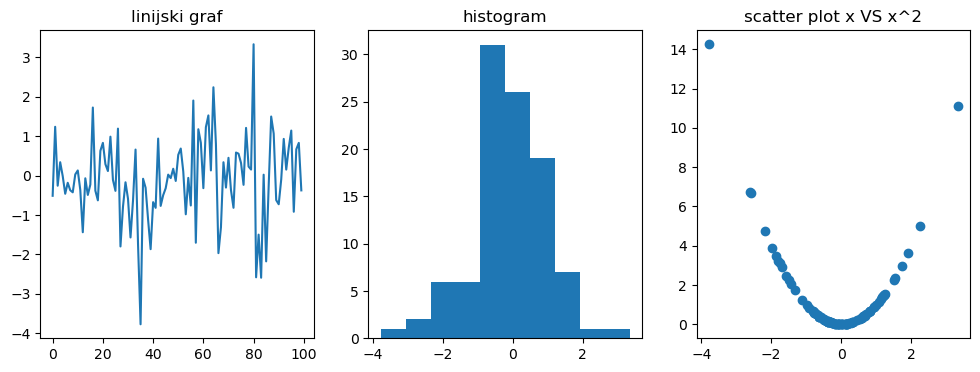

In [9]:
import matplotlib.pyplot as plt
x = rng.normal(size=100)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].plot(x)
ax[0].set_title("linijski graf")

ax[1].hist(x)
ax[1].set_title("histogram")

ax[2].scatter(x, x**2)
ax[2].set_title("scatter plot x VS x^2")
plt.show()

## Zadatak 5: Matplotlib – mreža subplotova (2×2)

U ovom zadatku koristi se složeniji raspored grafika.

**Podzadaci:**
1. Napraviti figuru sa mrežom **2×2 subplotova**  
2. Generisati dva vektora `x` i `y` iste dužine sa slučajnim vrednostima  
3. Prikazati sledeće grafike:
   - (0,0): scatter graf `x` vs `y`  
   - (0,1): scatter graf `x` vs `y` sa drugim markerom  
   - (1,0): linijski graf vektora `x`  
   - (1,1): histogram vektora `y`  
4. Podesiti naslov svakog od zadatih grafika  
5. Podesiti veličinu figure tako da svi grafici budu jasno vidljivi
6. Sačuvati grafik kao .png fajl

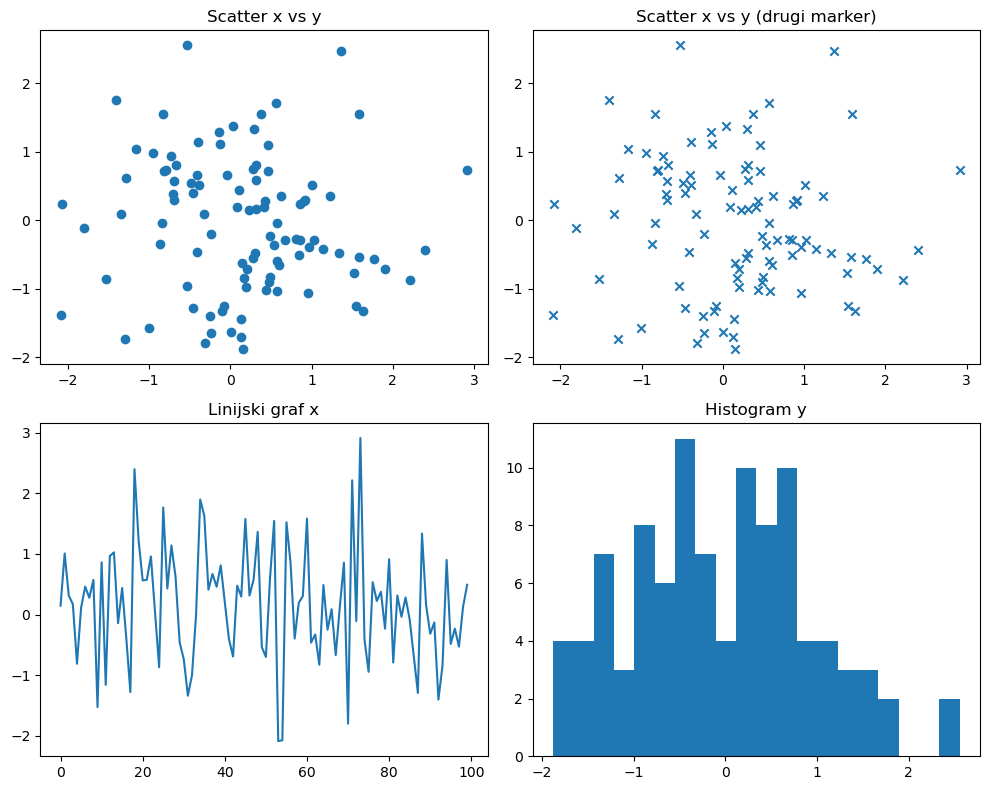

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(100)
y = np.random.randn(100)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(x, y)
axs[0, 0].set_title("Scatter x vs y")

axs[0, 1].scatter(x, y, marker='x')
axs[0, 1].set_title("Scatter x vs y (drugi marker)")

axs[1, 0].plot(x)
axs[1, 0].set_title("Linijski graf x")

axs[1, 1].hist(y, bins=20)
axs[1, 1].set_title("Histogram y")

plt.tight_layout()
plt.savefig("zadatak5.png")
plt.show()